In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import butter, filtfilt

In [23]:
class Senoidal:
    def __init__(self, frecuencia=1, amplitud=1, fase=0, puntos=50, tipo='seno', type=1):
        self.frecuencia = frecuencia
        self.amplitud = amplitud
        self.fase = fase
        self.t = np.linspace(0, 2/frecuencia, puntos)  # Ajustar el rango de t a 2 periodos
        self.tipo = tipo
        self.type = type
        if self.tipo == 'seno':
            self.senoidal = self.amplitud * np.sin(2 * np.pi * self.frecuencia * self.t + self.fase)
        elif self.tipo == 'coseno':
            self.senoidal = self.amplitud * np.cos(2 * np.pi * self.frecuencia * self.t + self.fase)
        else:
            raise ValueError("El tipo debe ser 'seno' o 'coseno'")
    def plot(self):
        if self.type == 0:
            plt.plot(self.t, self.senoidal, label=f'{self.tipo.capitalize()}idal')
        else:
            plt.stem(self.t, self.senoidal, label=f'{self.tipo.capitalize()}idal')
        plt.legend()
        plt.title(f'Función {self.tipo.capitalize()}idal')
        plt.xlabel('t')
        plt.ylabel('Amplitud')
        plt.grid(True)
        plt.show()

class Exponencial:
    def __init__(self, frecuencia=1, amplitud=1, fase=0, puntos=50, type=1):
        self.frecuencia = frecuencia
        self.amplitud = amplitud
        self.fase = fase
        self.type = type
        self.t = np.linspace(0, 2/frecuencia, puntos)  # Ajustar el rango de t a 2 periodos
        self.exponencial = self.amplitud * np.exp(1j * (2 * np.pi * self.frecuencia * self.t + self.fase))
    
    def plot(self):
        if self.type == 0:
            plt.plot(self.t, np.real(self.exponencial), label='Real', color='blue')
            plt.plot(self.t, np.imag(self.exponencial), label='Imaginaria', color='red')
        else:
            plt.stem(self.t, np.real(self.exponencial), label='Real', linefmt='b-', markerfmt='bo', basefmt='r-')
            plt.stem(self.t, np.imag(self.exponencial), label='Imaginaria', linefmt='r-', markerfmt='ro', basefmt='b-')
        plt.legend()
        plt.title('Función Exponencial con Exponente Imaginario')
        plt.xlabel('t')
        plt.ylabel('Amplitud')
        plt.grid(True)
        plt.show()

## Ejercicio 1.2
Determine wich of the following sinusoids are periodic and compute their fundamental period.

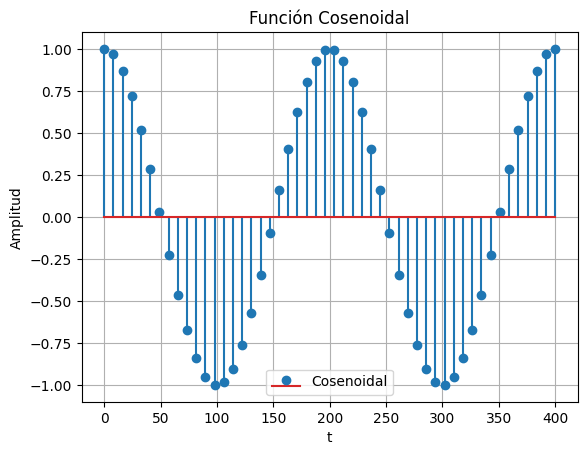

In [24]:
signal_a = Senoidal(frecuencia=0.005, tipo='coseno')
signal_a.plot()

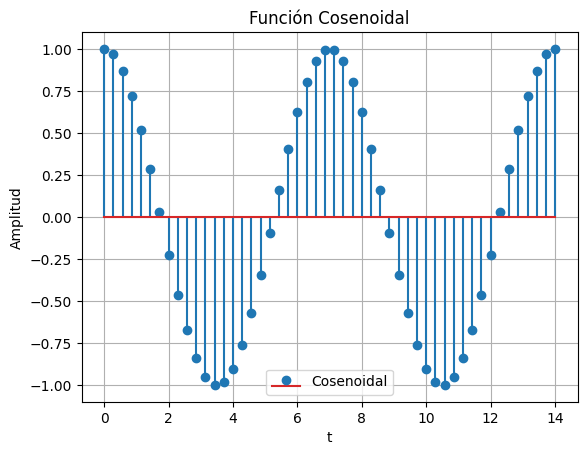

In [25]:
signal_b = Senoidal(frecuencia=1/7, tipo='coseno')
signal_b.plot()

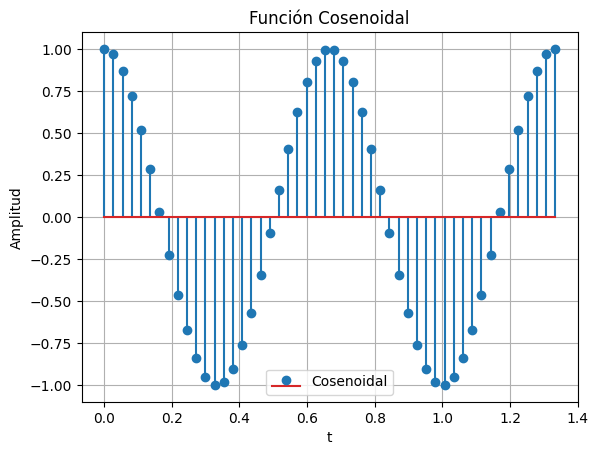

In [26]:
signal_c = Senoidal(frecuencia=1.5, tipo='coseno')
signal_c.plot()

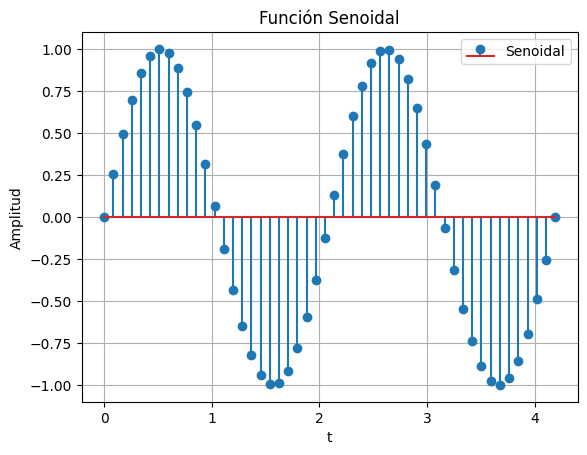

In [27]:
signal_d = Senoidal(frecuencia=(3/(2*np.pi)), tipo='seno')
signal_d.plot()

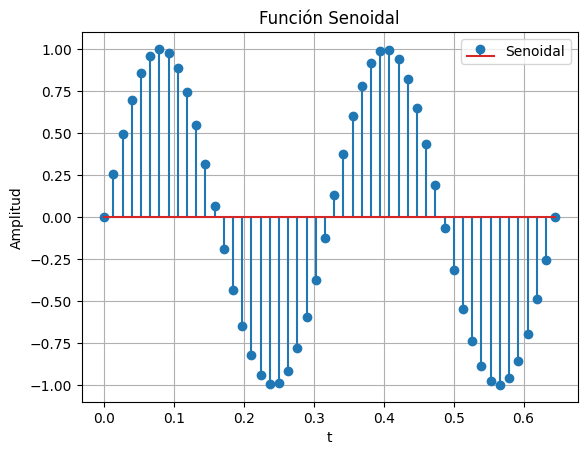

In [28]:
signal_e = Senoidal(frecuencia=3.1, tipo='seno')
signal_e.plot()

## Ejercicio 1.3
DEtermine wich of the following sinusoids are periodic and compute their fundamental period.

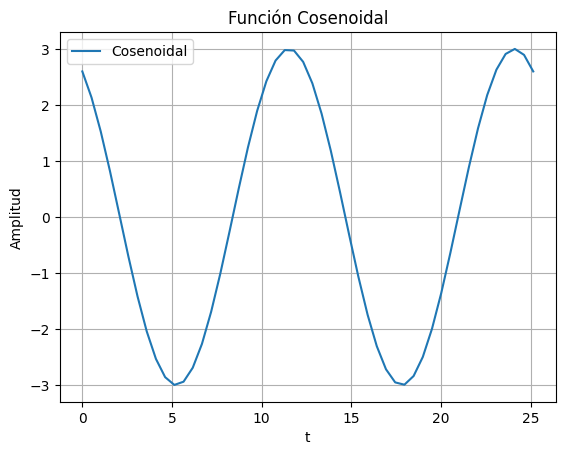

In [29]:
signal_a = Senoidal(frecuencia=0.5/(2*np.pi), amplitud=3,fase=(np.pi/6), tipo='coseno', type=0)
signal_a.plot()

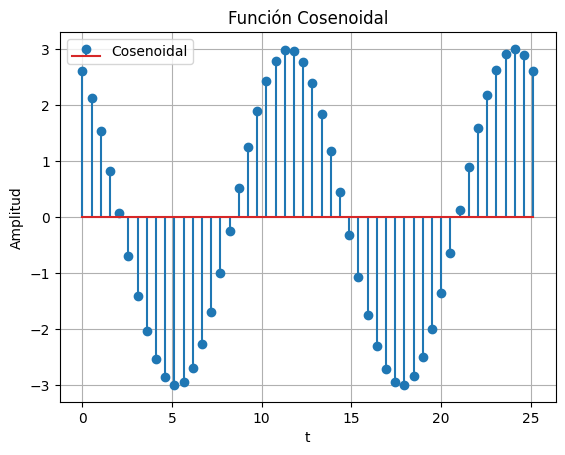

In [30]:
signal_b = Senoidal(frecuencia=0.5/(2*np.pi), amplitud=3,fase=(np.pi/6), tipo='coseno')
signal_b.plot()

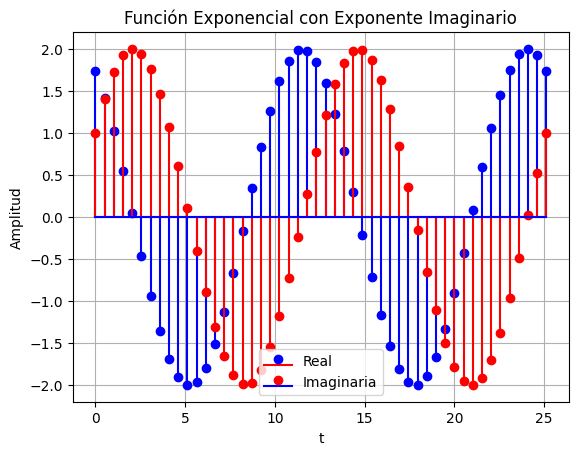

In [31]:
signal_c = Exponencial(frecuencia=0.5/(2*np.pi), amplitud=2,fase=(np.pi/6))
signal_c.plot()

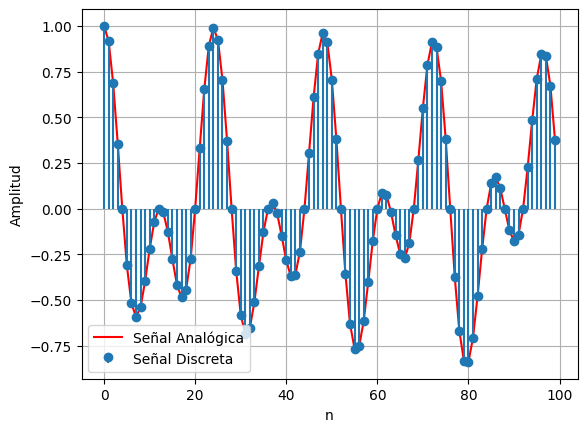

In [32]:
# signal_d es un producto de cosenos
COS0 = lambda n: np.cos(n/8)
COS1 = lambda n: np.cos((np.pi/8)*n)
ni = np.arange(0, 100, 1)               # vector de tiempo discreto

signal_d = COS0(ni) * COS1(ni)

# Gráfica: 
plt.figure()
plt.plot(ni, signal_d, label='Señal Analógica', color='red')
plt.stem(ni, signal_d, label='Señal Discreta', basefmt=" ")
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()                      

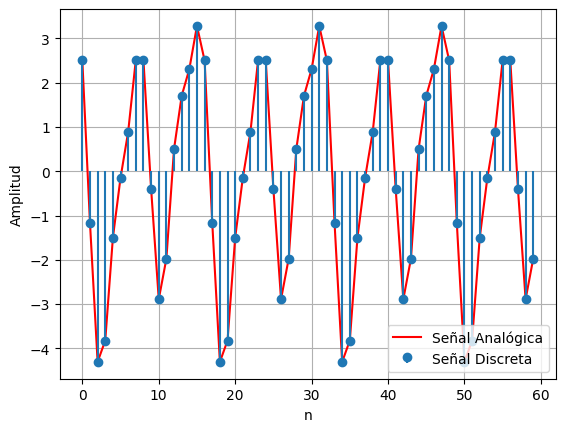

In [33]:
# signal_d es una suma de trigonometricas
COS0 = lambda n: np.cos((np.pi/2)*n)
SIN0 = lambda n: np.sin((np.pi/8)*n)
COS1 = lambda n: 3*np.cos((np.pi/4)*n + np.pi/3)
ni = np.arange(0, 60, 1)               # vector de tiempo discreto

signal_d = COS0(ni) - SIN0(ni) + COS1(ni)

# Gráfica: 
plt.figure()
plt.plot(ni, signal_d, label='Señal Analógica', color='red')
plt.stem(ni, signal_d, label='Señal Discreta', basefmt=" ")
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show() 

## Ejercicio 1.5
a) sketch the signal for 0<=t<=30ms

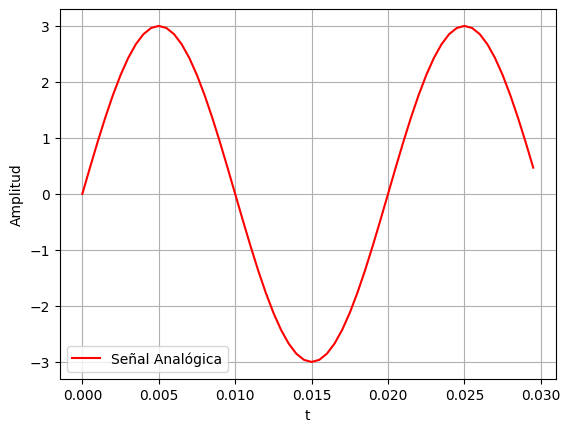

In [34]:
fo = 50
w = 2*np.pi*fo
Xa = lambda t: 3*np.sin(w*t)
ti = np.arange(0, 0.03, 0.0005)  # vector de tiempo continuo

signal_a = Xa(ti)

# Gráfica:
plt.figure()
plt.plot(ti, signal_a, label='Señal Analógica', color='red')
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

b) The signal Xa is sampled with a sampling rate Fs=300 samples/s. Determine the frecuency of the discrete-time signal x(n) = Xa(nT). T = 1/Fs, and show that it is periodic

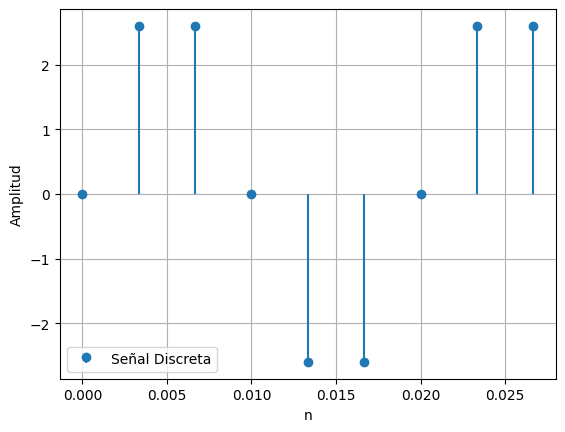

In [35]:
Fs = 300                         # Frecuencia de muestreo en Hz
Ts = 1/Fs                        # Periodo de muestreo en segundos
ni = np.arange(0, 0.03, Ts)      # vector de tiempo discreto

signal_a = Xa(ni)

# Gráfica:
plt.figure()
plt.stem(ni, signal_a, label='Señal Discreta', basefmt=" ")
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

c) Compute the sample values of one period of x(n). Sketch x(n) on the same diagram with Xa(t). What is the period of the descrite-time signal in milliseconds?

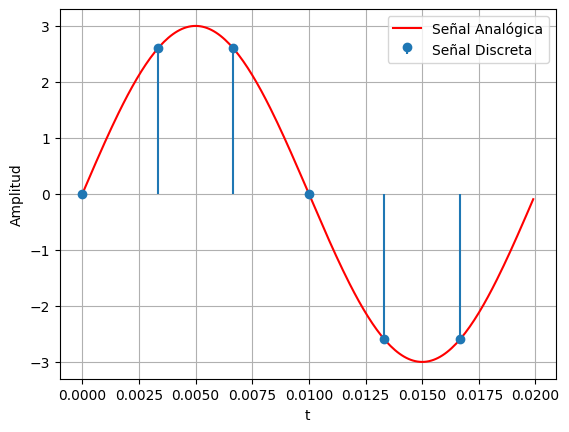

In [36]:
ni = np.arange(0, 1/fo, Ts)      # vector de tiempo discreto
Xn = Xa(ni)                      # Señal muestreada

ti = np.arange(0, 1/fo, .0001)   # vector de tiempo continuo
X_a = Xa(ti)                     # Señal original

# Gráfica:  
plt.figure()
plt.plot(ti, X_a, label='Señal Analógica', color='red')
plt.stem(ni, Xn, label='Señal Discreta', basefmt=" ")
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()


d) Can you find a sampling rate Fs such that the signal x(n) reaches its peak value of 3? WHat is the minimum Fs suitable for this task?

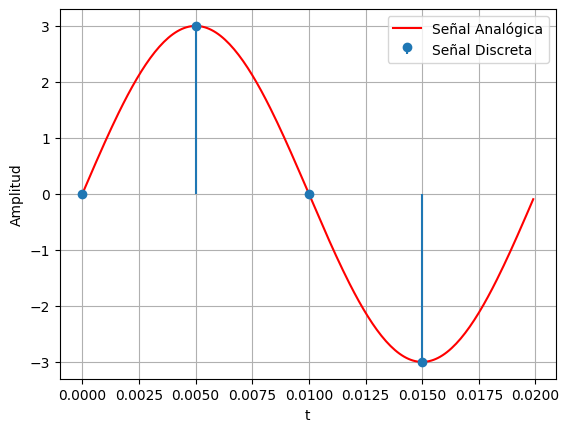

In [37]:
Fs = 200                         # Frecuencia de muestreo en Hz
Ts = 1/Fs                        # Periodo de muestreo en segundos
ni = np.arange(0, 1/fo, Ts)      # vector de tiempo discreto
Xn = Xa(ni)                      # Señal muestreada

# Gráfica:  
plt.figure()
plt.plot(ti, X_a, label='Señal Analógica', color='red')
plt.stem(ni, Xn, label='Señal Discreta', basefmt=" ")
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

# Ejercicio 1.7
Consideremos una señal analógica con componentes de frecuencia hasta **10 kHz**.

---

## 1. Rango de frecuencias de muestreo para reconstrucción exacta

Para reconstruir exactamente la señal a partir de sus muestras se aplica el **teorema del muestreo de Nyquist-Shannon**, que establece que la frecuencia de muestreo F_s debe ser al menos el doble de la máxima frecuencia presente en la señal. 
Dado que la máxima frecuencia es F_max = 10kHz, se requiere 20kHz
Por lo tanto, cualquier frecuencia de muestreo **mayor o igual a 20 kHz** permite la reconstrucción exacta de la señal (suponiendo un sistema ideal).

---
## 2. Efecto de muestrear con F_s = 8kHz en la componente F_1 = 5kHz

Con una frecuencia de muestreo de F_s = 8kHz, la frecuencia de Nyquist es 4kHz
Dado que 5kHz > 4kHz, la componente de **5 kHz** se encuentra por encima del límite de Nyquist y sufrirá **aliasing**. 

Para determinar la frecuencia aparente (alias), usamos la relación:

F_alias = | F - k*F_s |

donde k es un entero elegido de forma que F_alias caiga en el rango [0, F_Nyquist].

Para F = 5kHz y F_s = 8kHz, tomando k = 1 se tiene:

F_alias = | 5kHz - 8kHz | = 3kHz

Así, la componente de **5 kHz** aparece en la señal muestreada como una componente de **3 kHz**.

---

## 3. Efecto de muestrear con F_s = 8kHz en la componente F_2 = 9kHz

Aplicando el mismo procedimiento para F = 9kHz:
Tomando k = 1 se obtiene:

F_alias = | 9kHz - 8kHz | = 1kHz

Por lo tanto, la componente de **9 kHz** se verá en la señal muestreada como una componente de **1 kHz**.


## Ejercicio 1.8

Consideremos que una señal de electrocardiograma analógica contiene frecuencias útiles hasta **100 Hz**.

---

### 1. Tasa de Nyquist

El teorema de muestreo de Nyquist-Shannon establece que para reconstruir exactamente la señal, la frecuencia de muestreo debe ser al menos el doble de la máxima frecuencia presente en la señal.  
Por lo tanto, la tasa de Nyquist es 200Hz

---

### 2. Frecuencia máxima representable a 250 muestras/s

Si se muestrea la señal a una tasa de F_s = 250 muestras por segundo, la frecuencia de Nyquist para la señal muestreada es 125Hz
Esto significa que la frecuencia más alta que puede representarse de forma única (sin aliasing) es **125 Hz**.

---


## Ejercicio 1.9
An analog signal Xa(t) = sin(480*pi*t) + 3sin(720*pi*t) is sampled 600 times per second.
1. Determine the Nyquist sampling rate for Xa(t)

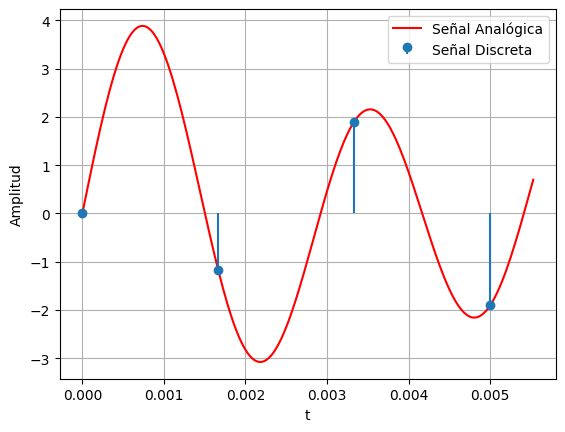

In [38]:
# signal_d es una suma de trigonometricas
SIN0 = lambda t: np.sin(480*np.pi*t)
SIN1 = lambda t: 3*np.sin(720*np.pi*t)
fo = 360                                 # Frecuencia más alta en Hz de la señal 
ti = np.arange(0, 2/fo, 1/(100*fo))      # vector de tiempo continuo

Fs = 600                                 # Frecuencia de muestreo en Hz
Ts = 1/Fs                                # Periodo de muestreo en segundos
ni = np.arange(0, 2/fo, Ts)              # vector de tiempo discreto

signal_a = SIN0(ti) + SIN1(ti)           # Señal analógica
signal_d = SIN0(ni) + SIN1(ni)           # Señal muestreada

# Gráfica: 
plt.figure()
plt.plot(ti, signal_a, label='Señal Analógica', color='red')
plt.stem(ni, signal_d, label='Señal Discreta', basefmt=" ")
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show() 

2. Determine the folding frequency. -> 300hz
3. What are the frecuencies, in radians, in the resulting descrite time signal x(n)? -> 0.8*pi y 1.2*pi
4. If x(n) is passed through an ideal D/A converter, what is the reconstructed signal Ya(t)?

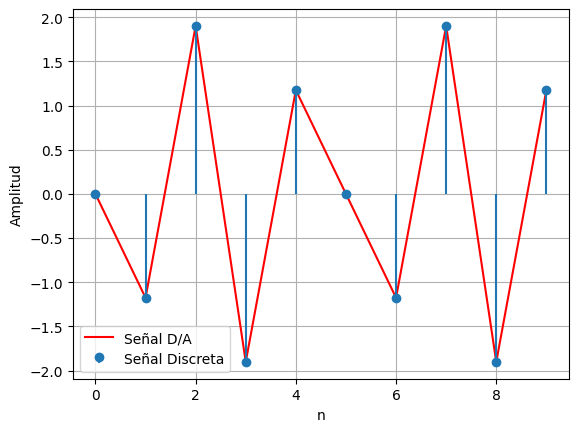

In [39]:
# La función una vez sido muestreada, se puede representar como:
SIN0 = lambda n: np.sin((1/5)*4*np.pi*n)
SIN1 = lambda n: 3*np.sin((1/5)*6*np.pi*n)

ni = np.arange(0, 10, 1)              # vector de tiempo discreto

signal_d = SIN0(ni) + SIN1(ni)           # Señal muestreada

# Gráfica: 
plt.figure()
plt.plot(ni, signal_d, label='Señal D/A', color='red')
plt.stem(ni, signal_d, label='Señal Discreta', basefmt=" ")
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show() 

## Ejercicio 1.10

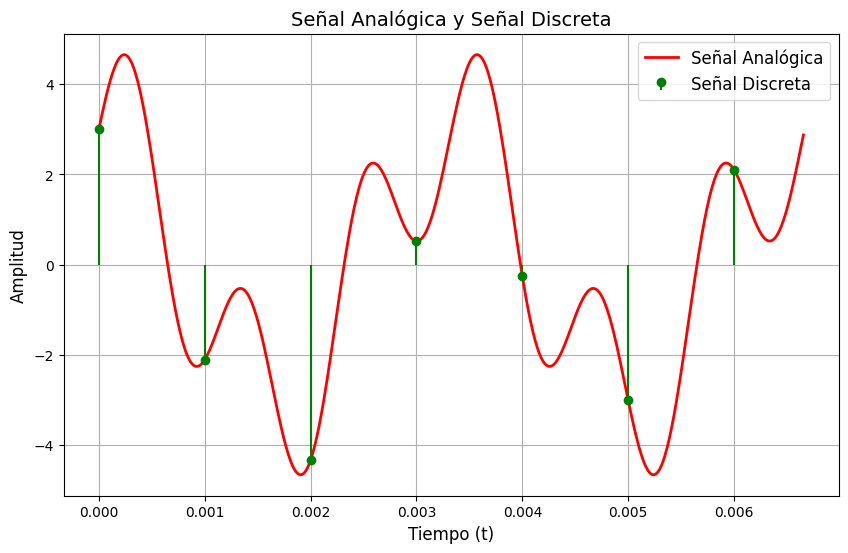

In [40]:
# signal_d es una suma de trigonometricas
COS0 = lambda t: 3*np.cos(600*np.pi*t)
SIN1 = lambda t: 2*np.sin(1800*np.pi*t)
F0_max = 900                                 # Frecuencia más alta en Hz de la señal 
F0_min = 300                                 # Frecuencia más baja en Hz de la señal
ti = np.arange(0, 2/F0_min, 1/(100*F0_max))      # vector de tiempo continuo

Fs = 1000                                # Frecuencia de muestreo en Hz
Ts = 1/Fs                                # Periodo de muestreo en segundos
ni = np.arange(0, 2/F0_min, Ts)              # vector de tiempo discreto

signal_a = COS0(ti) + SIN1(ti)           # Señal analógica
signal_d = COS0(ni) + SIN1(ni)           # Señal muestreada

# Gráfica: 
plt.figure(figsize=(10, 6))
plt.plot(ti, signal_a, label='Señal Analógica', color='red', linewidth=2)
plt.stem(ni, signal_d, label='Señal Discreta', basefmt=" ", linefmt='green', markerfmt='go')
plt.xlabel('Tiempo (t)', fontsize=12)
plt.ylabel('Amplitud', fontsize=12)
plt.title('Señal Analógica y Señal Discreta', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

## Ejercicio 1.11

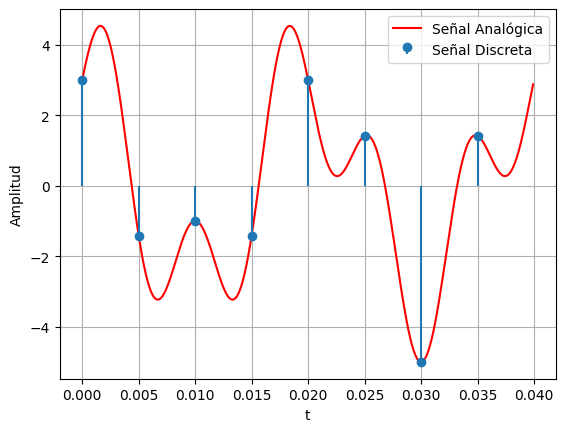

In [41]:
f0 = 50                                 # Frecuencia más baja en Hz de la señal
f1 = 125                                # Frecuencia más alta en Hz de la señal  
COS0 = lambda t: 3*np.cos(2*np.pi*f0*t)
SIN0 = lambda t: 2*np.sin(2*np.pi*f1*t)

Fs = 200                                 # Frecuencia de muestreo en Hz
Ts = 1/Fs                                # Periodo de muestreo en segundos

ti = np.arange(0, 2/f0, 1/(f1*100))      # vector de tiempo continuo
ni = np.arange(0, 2/f0, Ts)              # vector de tiempo discreto

signal_a = COS0(ti) + SIN0(ti)           # Señal analógica
signal_d = COS0(ni) + SIN0(ni)           # Señal muestreada

# Gráfica:
plt.figure()    
plt.plot(ti, signal_a, label='Señal Analógica', color='red')
plt.stem(ni, signal_d, label='Señal Discreta', basefmt=" ")
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

La frecuencia de corte es: 100.0 Hz


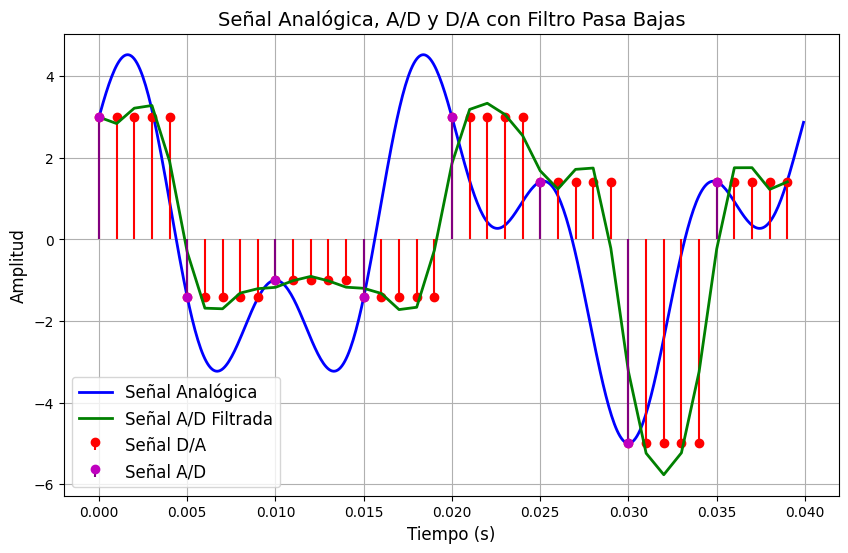

In [ ]:
#Señal reconstruida en un A/D en 1ms como frecuencia de muestreo
Tadc = 0.001                # Periodo de muestreo del A/D

AD = []                     # Señal reconstruida 
for sample in signal_d:
    for i in range(0, int(Ts/Tadc)):   # EL A/D muestrea 5 veces más rápido que el D/A
        AD.append(sample)

nx = np.arange(0, len(AD), 1)              # vector de tiempo discreto

# Diseño del filtro pasa bajas
nyquist = Fs
low_cutoff = nyquist / 2
b, a = butter(4, low_cutoff / nyquist, btype='low')

# Aplicar el filtro a la señal reconstruida
AD_filtered = filtfilt(b, a, AD)
nx_filtered = np.arange(0, len(AD_filtered), 1)

print(f"La frecuencia de corte es: {low_cutoff} Hz")

# Gráfica:
plt.figure(figsize=(10, 6))    
plt.plot(ti, signal_a, label='Señal Analógica', color='blue', linewidth=2)
plt.stem(nx * Tadc, AD, label='Señal D/A', basefmt=" ", linefmt='red', markerfmt='ro')
plt.plot(nx_filtered * Tadc, AD_filtered, label='Señal A/D Filtrada', color='green', linewidth=2)
plt.stem(ni, signal_d, label='Señal A/D', basefmt=" ", linefmt='purple', markerfmt='mo')
plt.xlabel('Tiempo (s)', fontsize=12)
plt.ylabel('Amplitud', fontsize=12)
plt.title('Señal Analógica, A/D y D/A con Filtro Pasa Bajas', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

## Ejercicio 1.15
1. Plot the signal x(n), 0<=n<=99 for Fs = 5kHZ and F0=0.5,2,3, and 4.5kHz

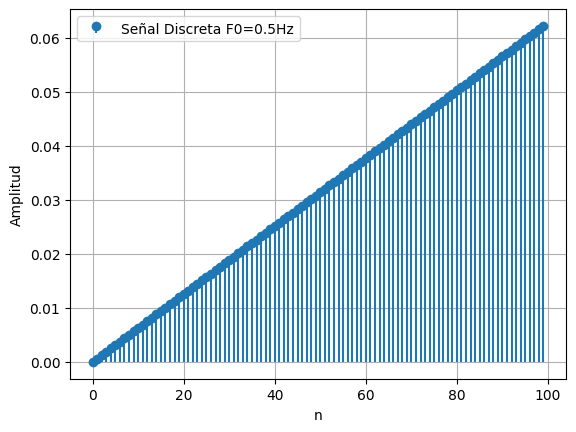

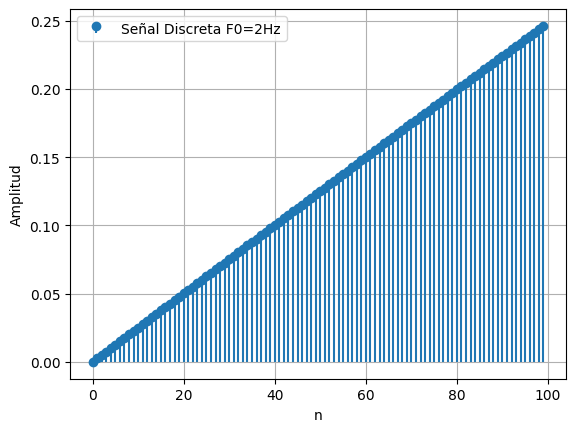

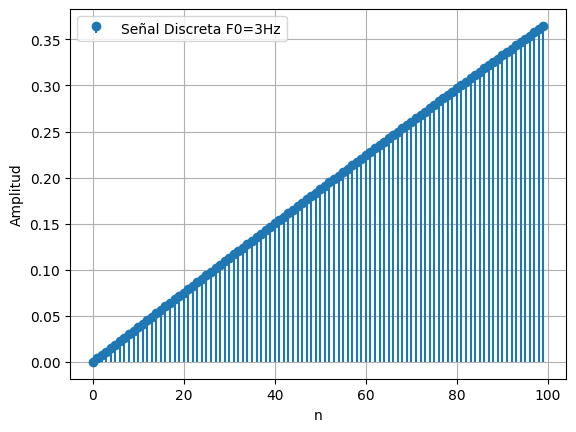

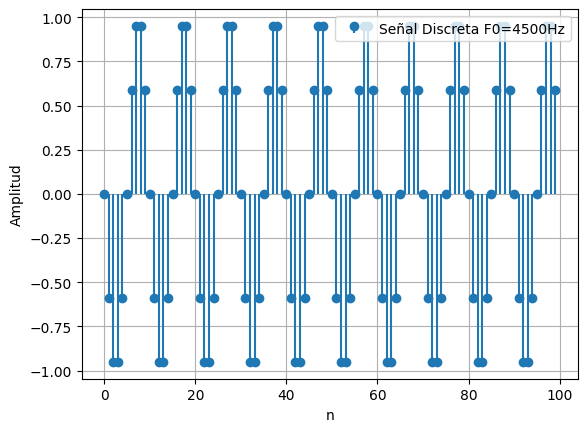

In [43]:
F0 = [0.5, 2, 3, 4500]                         # Frecuencia de la señal
Fs = 5000                                      # Frecuencia de muestreo

ni = np.arange(0, 100, 1)                       # vector de tiempo discreto

# Gráfica:
def plot_signal(F0):
    Xn = lambda n: np.sin(2*np.pi*(F0/Fs)*n)
    Xn_values = Xn(ni)  # Señal muestreada

    # Gráfica:
    plt.figure()
    plt.stem(ni, Xn_values, label=f'Señal Discreta F0={F0}Hz', basefmt=" ")
    plt.xlabel('n')
    plt.ylabel('Amplitud')
    plt.legend()
    plt.grid(True)
    plt.show()

    return Xn_values

# Plot signals for each frequency in F0
for f in F0:
    plot_signal(f)


b) Suppose that F0 = 2kHZ and FS = 50kHZ
1. PLot the signal x(n). WHat is the frequency f0 of the signal x(n)?
2. Plot the signal y(n) created by taking the even-numbered samples of x(n). Is this a sinusoidal signal? Why? If so, what is its frequency?

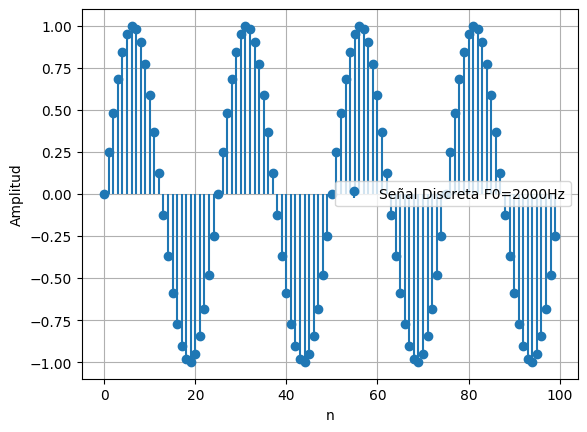

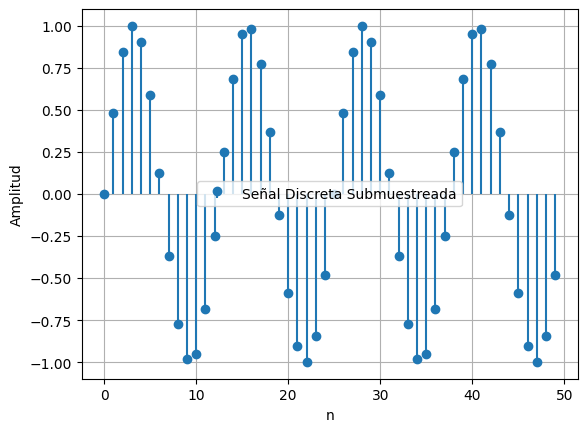

In [44]:
F0 = 2000  # Frecuencia de la señal en Hz
Fs = 50000  # Frecuencia de muestreo en Hz

Xn = plot_signal(F0) #1-

# 2-
Yn = Xn[::2]
yi = np.arange(0, len(Yn), 1)  # vector de tiempo discreto

# Gráfica:
plt.figure()
plt.stem(yi, Yn, label='Señal Discreta Submuestreada', basefmt=" ")
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()
